 The average of all ages is 39.21
 The number of people from southwest is 325 
 The number of people from northwest is 325 
 The number of people from southeast is 364 
 And the number of people from northeast is 324 
 Therefore, the region with the highest population is South East and its value is 364


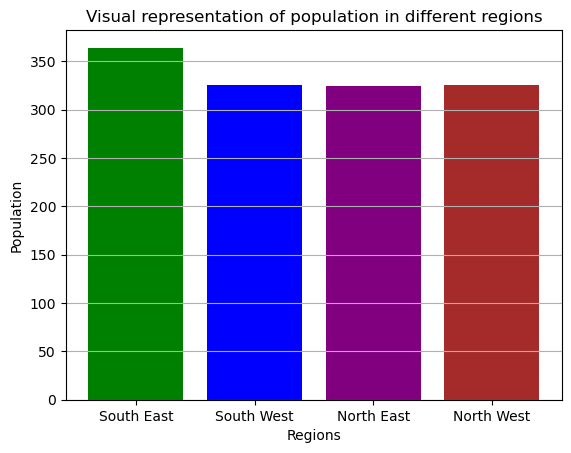

['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no'

In [45]:
import csv
import numpy 
import matplotlib.pyplot as plt

#save ages to a list and then calculate average ages
#save regions to a list

ages=[]
region=[]
smoker=[]
children=[]
charges=[]
bmis=[]
sex=[]

def load_data(file_name,lst,column_name):

    with open (file_name) as insurance_file:
        insurance_reader = csv.DictReader(insurance_file)
        for row in insurance_reader:
            lst.append(row[column_name])
        return lst
            
# look at the data in insurance_csv_dict
load_data(lst = ages, file_name = 'insurance.csv', column_name = 'age')
load_data(lst = sex, file_name = 'insurance.csv', column_name ='sex')
load_data(lst = bmis, file_name = 'insurance.csv', column_name ='bmi')
load_data(lst = children,file_name = 'insurance.csv',column_name = 'children')
load_data(lst = smoker, file_name = 'insurance.csv', column_name ='smoker')
load_data(lst = region, file_name = 'insurance.csv',column_name = 'region')
load_data(lst = charges,file_name =  'insurance.csv', column_name ='charges')





#convert list of strings to integer
agesint = [eval(i) for i in ages]
#print(agesint)

#calculate average of ages
ages_avg = numpy.average(agesint)
rounded_ages_avg = ages_avg.round(2)
print(" The average of all ages is", rounded_ages_avg)


#calculate majority of region
#print(region)
southeastcount = 0
southwestcount = 0
northeastcount = 0
northwestcount = 0

for index in region:
    if index == "southwest":
        southwestcount += 1
    elif index == "southeast":
        southeastcount += 1
    elif index == "northeast":
        northeastcount += 1
    elif index == "northwest":
        northwestcount += 1
#key parameter set to a lambda function that returns the second element of each tuple (the value). 
#This lambda function ensures that the maximum value is compared and determined correctly.

regions = [("South East",southeastcount),("South West", southwestcount),("North East", northeastcount),("North West", northwestcount)]

max_region = max(regions, key = lambda x: x[1])
variable_name, variable_value = max_region


print(" The number of people from southwest is", southwestcount, "\n", "The number of people from northwest is", northwestcount, "\n",
      "The number of people from southeast is", southeastcount, "\n", "And the number of people from northeast is", northeastcount, "\n"
      " Therefore, the region with the highest population is", variable_name, "and its value is", variable_value)
#Create graph visualisng the regions
# Extract variable names from the list of tuples for x axis
x_axis = [tup[0] for tup in regions]
# Extract variable values from the list of tuplesfor y axis
y_axis = [values[1] for values in regions]
colours = ['green', 'blue', 'purple', 'brown']
plt.bar(x_axis, y_axis, color = colours)
plt.title('Visual representation of population in different regions')
plt.xlabel('Regions')
plt.ylabel('Population')
plt.grid(axis ="y")
plt.show()

